# ARCHER Benchmark Baseline results

Baseline results for selected benchmarks run on ARCHER.

## Import required modules for results analysis

In [27]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})
import pandas as pd

In [28]:
import sys
sys.path.append('../python-modules')

In [29]:
from utilities import filemanip

## CASTEP: Large DNA Benchmark

In [30]:
from appanalysis import castep

In [31]:
castepfiles = filemanip.get_filelist('../apps/CASTEP/DNA/results/ARCHER_baseline', 'polyA20')

In [32]:
df_list = castep.create_df_list(castepfiles, 24)
castep_df = pd.DataFrame(df_list)


Peformance (SCF cycles per second): 1 threads per MPI process
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
256   6144   0.002133  0.002133  0.002133  0.002133     1
512   12288  0.004322  0.004322  0.004322  0.004322     1
1024  24576  0.005996  0.005996  0.005996  0.005996     1
2048  49152  0.009036  0.009036  0.009036  0.009036     1

Peformance (SCF cycles per second): 2 threads per MPI process
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
128   3072   0.001149  0.001153  0.001157  0.001153     2
256   6144   0.002149  0.002149  0.002149  0.002149     1
512   12288  0.004492  0.004492  0.004492  0.004492     1
1024  24576  0.006986  0.006986  0.006986  0.006986     1
2048  49152  0.011313  0.011313  0.011313  0.011313     1

Pef

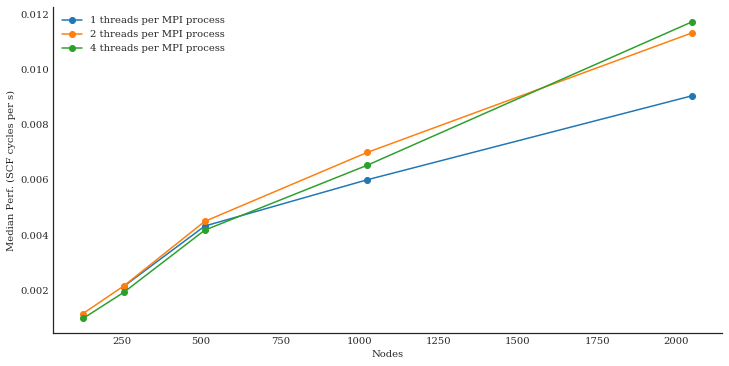

In [33]:
threading = [1, 2, 4]
for threads in threading:
    print('\nPeformance (SCF cycles per second): {0} threads per MPI process'.format(threads))
    nodes, perf_median = castep.get_perf_stats(castep_df, threads, 'median', writestats=True)
    plt.plot(nodes, perf_median, '-o', label='{0} threads per MPI process'.format(threads))
    plt.xlabel('Nodes')
    plt.ylabel('Median Perf. (SCF cycles per s)')
    plt.legend(loc='best')
    sns.despine()

## GROMACS: large benchmark

In [34]:
from appanalysis import gromacs

In [35]:
gromacsfiles = filemanip.get_filelist('../apps/GROMACS/large/results/ARCHER_baseline', 'nc2-cubic-md')

In [36]:
df_list = gromacs.create_df_list(gromacsfiles, 24)
gromacs_df = pd.DataFrame(df_list)


Peformance (ns/day): 1 thread per MPI process
              Perf                      Count
               min median    max   mean   sum
Nodes Cores                                  
2     48     0.048  0.048  0.048  0.048     1
4     96     0.078  0.078  0.078  0.078     1
8     192    0.143  0.143  0.143  0.143     1
16    384    0.248  0.248  0.248  0.248     1
32    768    0.414  0.414  0.414  0.414     1
64    1536   0.595  0.595  0.595  0.595     1
128   3072   0.790  0.790  0.790  0.790     1
256   6144   0.879  0.879  0.879  0.879     1
512   12288  0.934  0.934  0.934  0.934     1
1024  24576  0.937  0.937  0.937  0.937     1
2048  49152  1.040  1.040  1.040  1.040     1


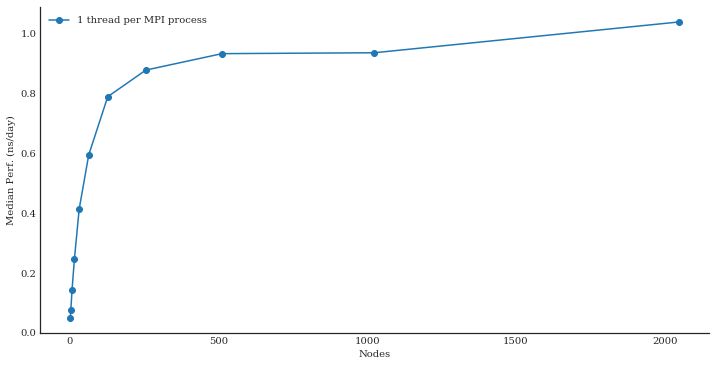

In [37]:
print('\nPeformance (ns/day): 1 thread per MPI process')
nodes, perf_median = gromacs.get_perf_stats(gromacs_df, 1, 'median', writestats=True)
plt.plot(nodes, perf_median, '-o', label='1 thread per MPI process')
plt.xlabel('Nodes')
plt.ylabel('Median Perf. (ns/day)')
plt.legend(loc='best')
sns.despine()

## OpenSBLI: Taylor-Green Vortex 1024 benchmark

In [38]:
from appanalysis import osbli

In [39]:
osblifiles = filemanip.get_filelist('../apps/OpenSBLI/TGV1024ss/results/ARCHER_baseline/', 'output')

In [40]:
df_list = osbli.create_df_list(osblifiles, 24)
osbli_df = pd.DataFrame(df_list)


Peformance (iterations/s): 1 thread per MPI process
                  Perf                                  Count
                   min     median        max       mean   sum
Nodes Cores                                                  
32    768     0.353292   0.353292   0.353292   0.353292     1
64    1536    0.696063   0.696063   0.696063   0.696063     1
128   3072    1.537693   1.537693   1.537693   1.537693     1
256   6144    2.810805   2.810805   2.810805   2.810805     1
512   12288   5.280667   5.377270   5.473873   5.377270     2
1024  24576  10.768204  10.768204  10.768204  10.768204     1


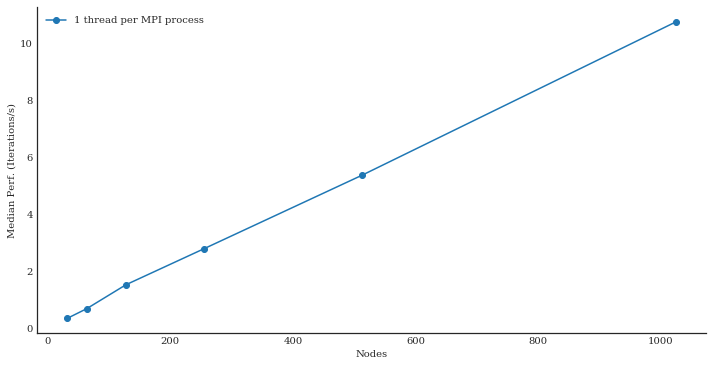

In [41]:
print('\nPeformance (iterations/s): 1 thread per MPI process')
nodes, perf_median = osbli.get_perf_stats(osbli_df, 'median', writestats=True)
plt.plot(nodes, perf_median, '-o', label='1 thread per MPI process')
plt.xlabel('Nodes')
plt.ylabel('Median Perf. (Iterations/s)')
plt.legend(loc='best')
sns.despine()

## CP2K: LiH-HFX benchmark

In [42]:
from appanalysis import cp2k

In [43]:
cp2kfiles = filemanip.get_filelist('../apps/CP2K/results/', 'CP2K_')

In [44]:
df_list = cp2k.create_df_list(cp2kfiles, 24)
cp2k_df = pd.DataFrame(df_list)


Peformance (Calculations/s): 6 threads per MPI process
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
128   3072   0.002884  0.002946  0.003000  0.002943     5
256   6144   0.004691  0.004980  0.005083  0.004941     5
512   12288  0.007043  0.007600  0.008133  0.007639     5
1024  24576  0.010139  0.010169  0.010834  0.010376     5
2048  49152  0.011915  0.012969  0.014780  0.013156     5


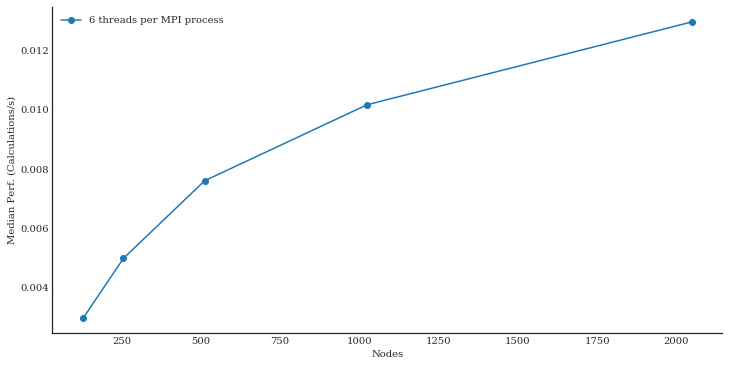

In [45]:
print('\nPeformance (Calculations/s): 6 threads per MPI process')
nodes, perf_median = cp2k.get_perf_stats(cp2k_df, 6, 'median', writestats=True)
plt.plot(nodes, perf_median, '-o', label='6 threads per MPI process')
plt.xlabel('Nodes')
plt.ylabel('Median Perf. (Calculations/s)')
plt.legend(loc='best')
sns.despine()

## benchio: 256^3 parallel write benchmark

In [46]:
from synthanalysis import benchio

In [47]:
benchiofiles = filemanip.get_filelist('../synth/benchio/results/ARCHER_baseline/', 'benchio_')

In [48]:
df_list = benchio.create_df_list(benchiofiles, 24)
benchio_df = pd.DataFrame(df_list)


Peformance (GiB/s):
                                          Write                            \
                                            min       median          max   
Writers Clients Striping LocalSize                                          
24      1       -1       256         626.643440   649.501906   661.382370   
48      2       -1       256        1214.314283  1279.835594  1298.294019   
96      4       -1       256        1948.041643  2122.853156  2199.732984   
192     8       -1       256        3335.053378  3600.663830  3638.948175   
384     16      -1       256        3188.271104  5323.668754  5497.900280   
768     32      -1       256        1405.026166  3286.149596  4407.080408   
1536    64      -1       256        5122.273963  5454.103930  6094.174941   
3072    128     -1       256        2707.862334  4145.732380  4783.900746   
6144    256     -1       256        5967.343614  7050.284249  8591.026594   
12288   512     -1       256        1849.337024  4755.5

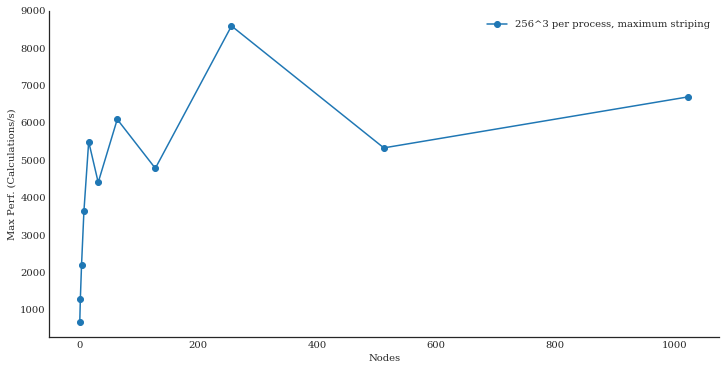

In [49]:
print('\nPeformance (GiB/s):')
cores, nodes, perf_median = benchio.get_perf_stats(benchio_df, -1, 256, 'max', writestats=True)
plt.plot(nodes, perf_median, '-o', label='256^3 per process, maximum striping')
plt.xlabel('Nodes')
plt.ylabel('Max Perf. (Calculations/s)')
plt.legend(loc='best')
sns.despine()